In [1]:
import pandas as pd
df = pd.read_csv('iris_csv.csv')
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
print(df.groupby('class').size())
import matplotlib.pyplot as plt
%matplotlib inline

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [3]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='class', ylabel='sepallength'>

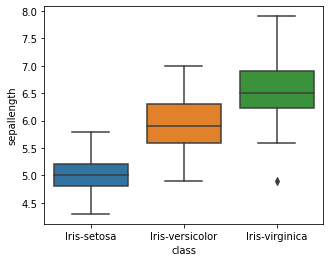

In [4]:
import seaborn as sn
plt.figure(figsize = (5,4))
sn.boxplot(x='class', y='sepallength', data = df)

<AxesSubplot:xlabel='class', ylabel='petallength'>

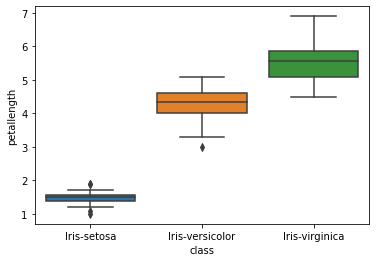

In [5]:
sn.boxplot(x='class', y='petallength', data = df)

<AxesSubplot:xlabel='class', ylabel='petalwidth'>

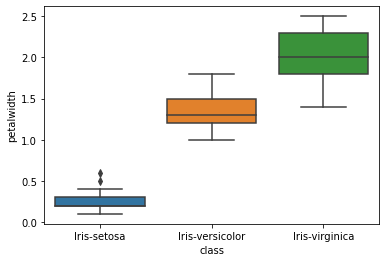

In [6]:
sn.boxplot(x='class', y='petalwidth', data = df)

<AxesSubplot:xlabel='class', ylabel='sepalwidth'>

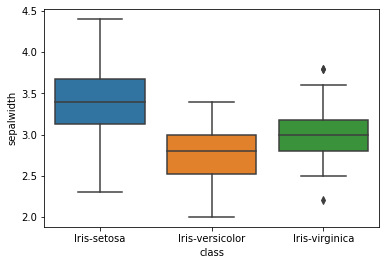

In [7]:
sn.boxplot(x='class', y='sepalwidth', data = df)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.sample(5)

,sepallength,sepalwidth,petallength,petalwidth,class
108,6.7,2.5,5.8,1.8,2
67,5.8,2.7,4.1,1.0,1
56,6.3,3.3,4.7,1.6,1
104,6.5,3.0,5.8,2.2,2
127,6.1,3.0,4.9,1.8,2


<AxesSubplot:>

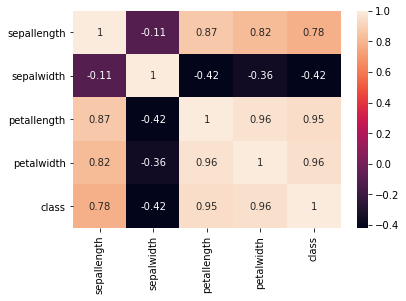

In [27]:
sn.heatmap(df.corr(), annot=True)

In [22]:
df.isna().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']], df['class'], test_size = 0.2)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(max_iter = 1000)

In [13]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [14]:
model.score(X_test, Y_test)

1.0

In [15]:
model.predict(X_test)

array([1, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2,
       0, 0, 0, 2, 2, 0, 1, 1])

In [16]:
y_predicted = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predicted, Y_test)
cm

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]], dtype=int64)

Text(15.0, 0.5, 'Truth')

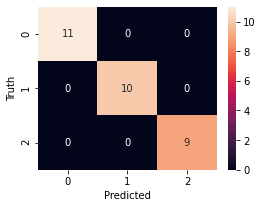

In [18]:
import seaborn as sn
plt.figure(figsize = (4, 3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
from sklearn.neighbors import KNeighborsClassifier
X = df.drop(['class'], axis = 'columns')
Y = df['class']
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(n_neighbors=4), X, Y, cv = 5).mean()

0.9733333333333334

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(max_iter = 1000), X, Y, cv = 5).mean()

0.9733333333333334

In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

